In [ ]:
!pip install datasets evaluate transformers[sentencepiece]
!pip install git+https://github.com/csebuetnlp/normalizer
!pip install accelerate -U
!pip install bnemo
!pip install bnunicodenormalizer
!gdown 1Qpb52KjdyqnqenyVkXbkNGwFOZ7NHNyZ
!gdown 1fM0l1OqUYypPVrKaD351cpU_6VA4s5ba
!gdown 199jQcOrThj3HOaGRWQrq8ed-Ias-y5Ta
!gdown 1N3eQyhLlpatdCHmJIvjP4nwl_WQhSJfH

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.6 MB/s eta 0:00:00
  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-5aprzexe
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-5a

In [ ]:
import pandas as pd
df_train = pd.read_table('blp23_sentiment_train.tsv')
df_val = pd.read_table('blp23_sentiment_dev.tsv')
df_test = pd.read_table('blp23_sentiment_test.tsv')

In [ ]:
df_train.head()

,id,text,label
0,10856,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral
1,sentinob_1072,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral
2,sentinob_10530,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive
3,8001,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative
4,sentinob_10144,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive


In [ ]:
len(df_train), len(df_val), len(df_test)

(35266, 3934, 3426)

In [ ]:
df_train.iloc[61]['text']

'Badhon'

In [ ]:
df_train["Number of Words"] = df_train["text"].apply(lambda n: len(n.split()))
df_train.head()

,id,text,label,Number of Words
0,10856,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral,14
1,sentinob_1072,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral,5
2,sentinob_10530,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive,11
3,8001,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative,15
4,sentinob_10144,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive,11


<Axes: >

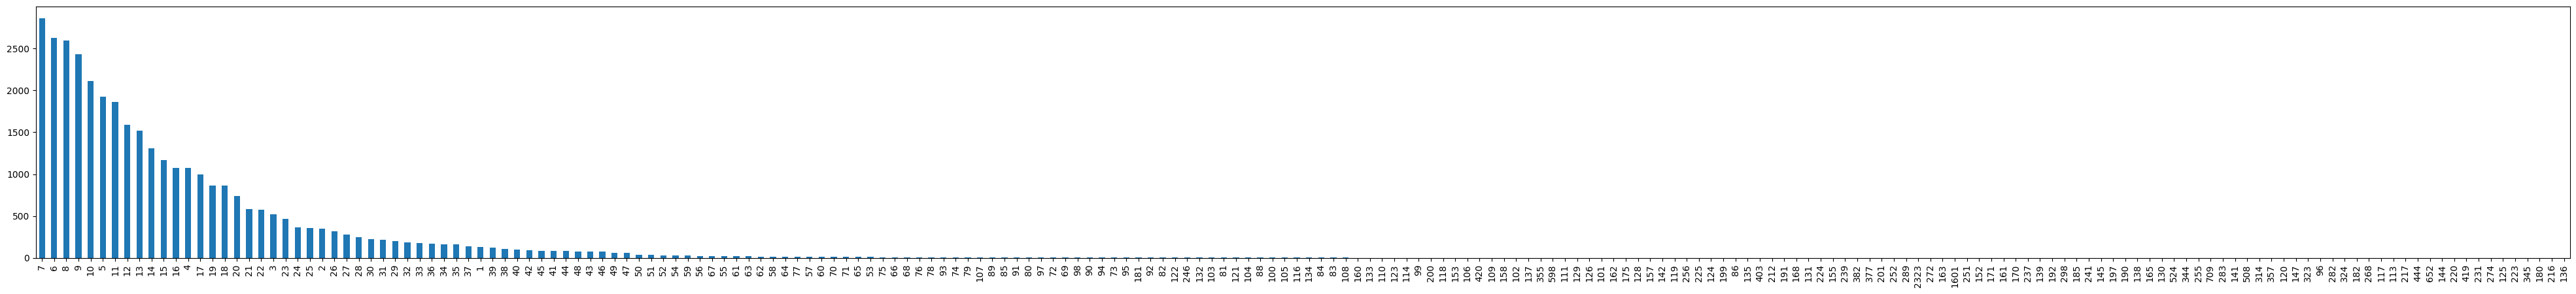

In [ ]:
df_train['Number of Words'].value_counts().plot(figsize=(50,5), kind='bar')

In [ ]:
df = df_train.drop(columns = ['Number of Words'])
df.head()

,id,text,label
0,10856,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral
1,sentinob_1072,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral
2,sentinob_10530,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive
3,8001,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative
4,sentinob_10144,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive


In [ ]:
map_labels = {
    'Neutral': 0,
    'Positive': 1,
    'Negative': 2
}

df['labels'] = df.label.apply(lambda x: map_labels[x])
df_val['labels'] = df_val.label.apply(lambda x: map_labels[x])

In [ ]:
df.iloc[61].text

'Badhon'

# URLs removers

In [ ]:
import re
from bnemo import Translator
import unicodedata
from bnunicodenormalizer import Normalizer

translator = Translator()
bnorm = Normalizer(allow_english=True)

# Regex for matching zero witdh joiner variations.
STANDARDIZE_ZW = re.compile(r'(?<=\u09b0)[\u200c\u200d]+(?=\u09cd\u09af)')

# Regex for removing standardized zero width joiner, except in edge cases.
DELETE_ZW = re.compile(r'(?<!\u09b0)[\u200c\u200d](?!\u09cd\u09af)')

# Regex matching punctuations to remove.
PUNC = re.compile(r'[`£|¢|Ñ+*/=–•।!()\[\]{};:\',"“\\’<>./?@#$^&*_~‘—॥”‰�￰￰]+')

# Regex to concate the numbers which are seperated by ,
pattern = r'(\d+)[ ,]+(\d+)'

def concate(text):
  return re.sub(pattern, r'\1\2', text)

def removeOptionalZW(text):
    """
    Removes all optional occurrences of ZWNJ or ZWJ from Bangla text.
    """
    text = STANDARDIZE_ZW.sub('\u200D', text)
    text = re.sub(r'\u200d', '', text)
    text = DELETE_ZW.sub('', text)
    return text

def removePunc(text):
    """
    Remove for punctuations from text.
    """
    text = PUNC.sub(r"", text)
    return text

def normalizeUnicode(text, normalize_nukta=True):
    """
    Normalizes unicode strings using the Normalization Form Canonical
    Composition (NFC) scheme where we first decompose all characters and then
    re-compose combining sequences in a specific order as defined by the
    standard in unicodedata module. Finally all zero-width joiners are
    removed.
    """
    if normalize_nukta:
        words = [ bnorm(word)['normalized']  for word in text.split() ]
        text = " ".join([word for word in words if word is not None])
        text = text.replace("\u2047", "-")

    text = text.replace(u"\u098c", u"\u09ef")
    text = unicodedata.normalize("NFC", text)
    text = removeOptionalZW(text)
    text = removePunc(text)

    return text

def emoji2btext(raw):
  txt = translator.translate(raw).text
  return raw if len(txt)==0 else txt

def lowercase_all_english_letters(text):
  pattern = re.compile(r"[A-Z]")
  lowercased_text = pattern.sub(lambda match: match.group().lower(), text)
  return lowercased_text

def preprocessing(text):
  txt = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
  txt = lowercase_all_english_letters(txt)
  txt = emoji2btext(txt)
  txt = concate(txt)
  txt = txt.replace('%', ' শতাংশ')
  return normalizeUnicode(txt)

In [ ]:
df['text'] = df.text.apply(lambda x: preprocessing(x))
df_val['text'] = df_val.text.apply(lambda x: preprocessing(x))
df_test['text'] = df_test.text.apply(lambda x: preprocessing(x))

In [ ]:
df.iloc[7002].text

'আন্তর্জাতিক ফ্লাইট স্থগিত করল ভারত'

In [ ]:
df.iloc[3366].text

'-  '

In [ ]:
len(df), len(df_val)

(35266, 3934)

In [ ]:
df.drop(df[df.text == ''].index, inplace=True)

In [ ]:
(df.text=='').value_counts()

False    35264
Name: text, dtype: int64

In [ ]:
df.to_csv('train.csv', index=False)
df_val.to_csv('val.csv', index=False)
df_test.to_csv('test.csv', index=False)

# Dataset

In [ ]:
train_split = '/content/train.csv'
val_split = '/content/val.csv'
test_ = "/content/test.csv"

In [ ]:
from datasets import load_dataset
train_dataset = load_dataset("csv", data_files=train_split)
val_dataset = load_dataset("csv", data_files=val_split)
test_dataset = load_dataset("csv", data_files=test_)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
train_dataset['train'][61]

{'id': '472', 'text': 'badhon', 'label': 'Negative', 'labels': 2}

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
max_length=512

# checkpoint = "csebuetnlp/banglabert"
checkpoint = "csebuetnlp/banglabert_large"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, max_length=max_length)

tokenized_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_val_datasets = val_dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/3934 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets['train'].column_names

['id',
 'text',
 'label',
 'labels',
 'input_ids',
 'token_type_ids',
 'attention_mask']

In [ ]:
tokenized_train_datasets = tokenized_datasets.remove_columns(["id", "text", "label", 'token_type_ids'])
tokenized_train_datasets.set_format("torch")
print(tokenized_train_datasets["train"].column_names)

tokenized_eval_datasets = tokenized_val_datasets.remove_columns(["id", "text", "label", 'token_type_ids'])
tokenized_eval_datasets.set_format("torch")
print(tokenized_eval_datasets["train"].column_names)

['labels', 'input_ids', 'attention_mask']
['labels', 'input_ids', 'attention_mask']


# BanglaBERT

In [ ]:
import evaluate
import numpy as np
from datasets import load_metric

def compute_metrics(eval_preds):
    metric = load_metric("f1")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average="micro")

In [ ]:
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer

training_args = TrainingArguments("Fine-tuned-BanglaBERT",
                                  evaluation_strategy="epoch",
                                  learning_rate=2e-5,
                                  warmup_ratio=0.1,
                                  gradient_accumulation_steps=2,
                                  weight_decay=0.01,
                                  lr_scheduler_type="linear",
                                  num_train_epochs=3,
                                  seed=1234,
                                  overwrite_output_dir=True,
                                  remove_unused_columns=False,
                                  local_rank= 1,
                                  load_best_model_at_end=True,
                                  save_total_limit=2,
                                  save_strategy="epoch",
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=16,
                                  optim='adafactor'
                                  )
dropout_rate = 0.5
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)
model.config.hidden_dropout_prob = dropout_rate
model.config.attention_probs_dropout_prob = dropout_rate

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_train_datasets["train"],
    eval_dataset=tokenized_eval_datasets["train"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# let's 🚀
trainer.train()

You're using a ElectraTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1
1,0.731100,0.724067,0.710981
2,0.616400,0.696484,0.719624
3,0.501600,0.748616,0.724708


<ipython-input-40-544f1dba6a92>:6: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("f1")


TrainOutput(global_step=3306, training_loss=0.6388353646630889, metrics={'train_runtime': 1335.2494, 'train_samples_per_second': 79.23, 'train_steps_per_second': 2.476, 'total_flos': 3285069687865728.0, 'train_loss': 0.6388353646630889, 'epoch': 3.0})

# Prediction

In [ ]:
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

tokenized_test_datasets

Map:   0%|          | 0/3426 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3426
    })
})

In [ ]:
tokenized_test_datasets = tokenized_test_datasets.remove_columns(["id", "text", 'token_type_ids'])
tokenized_test_datasets.set_format("torch")

In [ ]:
pred = trainer.predict(tokenized_test_datasets['train'])

In [ ]:
y = pred.predictions
y_pred = np.argmax(y, axis=-1)
y_pred[:5]

array([2, 2, 1, 1, 0])

In [ ]:
df_test['labels'] = y_pred

In [ ]:
df_test

,id,text,labels
0,30670,করোনায় আরো ১৮৭ জনের মৃত্যু মোট প্রাণহানি ২৪১...,2
1,4125,চাপাবাজীর চাপে এবার ধামাচাপা পড়বে আসল ইসু,2
2,27077,কুয়েতে বাংলাদেশী ফল খেতে হামলে পড়ছেন প্রবাসীরা,1
3,17552,তিনি ছিলেন টেস্ট খেলা সবচেয়ে বেশি বয়সী জীবিত...,1
4,4137,চাল আর পাট গুলো উৎপাদন করতে যে কৃষকের বাঁশ ঢুক...,0
...,...,...,...
3421,22376,পরকীয়ায় বাধা প্রেমিকের সহায়তায় স্বামীকে খু...,2
3422,1091,shamim ahmad এখানে হা হা দেয়া প্রাণীগুলা আবার...,2
3423,17792,বিশ্বকাপের সময়ের উন্মাদনা কাজে লাগানোকে বিশ্ব...,1
3424,23487,করোনার পরিস্থিতি মারাত্মক রূপ নেওয়ার আশঙ্কা,2


In [ ]:
id2label = {}
for k, v in map_labels.items():
  id2label[v] = k

In [ ]:
id2label

{0: 'Neutral', 1: 'Positive', 2: 'Negative'}

In [ ]:
with open('task.tsv', 'w') as f:
  f.write("id\tlabel\n")
  for i in range(len(df_test)):
    f.write(f"{df_test.iloc[i].id}\t{id2label[y_pred[i]]}\n")

In [ ]:
!zip 2_series3.zip task.tsv

  adding: task.tsv (deflated 77%)


In [ ]:
!zip -r model-normalize.zip '/content/Fine-tuned-BanglaBERT'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil

shutil.copyfile('/content/model-normalize.zip', '/content/drive/MyDrive/modeln.zip')

In [ ]:
shutil.copyfile('/content/task.zip', '/content/drive/MyDrive/task.zip')

In [ ]:
shutil.copyfile('/content/task.tsv', '/content/drive/MyDrive/task.tsv')